<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')
roomba_data=roomba_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
mobile_robot_data=mobile_robot_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)


In [14]:
mobile_robot_data.columns

Index(['X_ODOM', 'Y_ODOM', 'Theta', 'Velocity', 'Odometry_Distance', 'X_GR',
       'Y_GR', 'Ground_Truth_Distance', 'Surface_Type', 'Time_To_Travel',
       'Cumulative_Time', 'Cumulative_Theta', 'Series_ID',
       'Distance_travelled_error', 'X_error', 'Y_error', 'timestamp'],
      dtype='object')

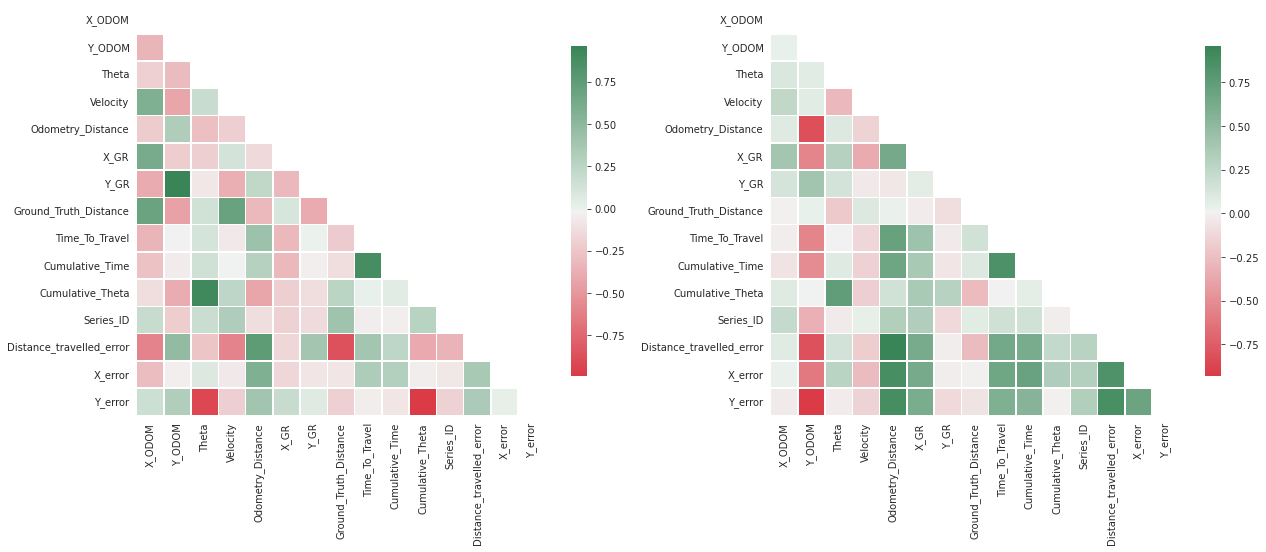

In [15]:
corr1 = roomba_data.corr()
corr2 = mobile_robot_data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr1, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(1,2,figsize=(18, 10))
cmap = sns.diverging_palette(10, 500, as_cmap=True)
sns.heatmap(corr1, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
sns.heatmap(corr2, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
f.tight_layout()

In [16]:
label=[]
for i in roomba_data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
roomba_data['Label']=label
label=[]
for i in mobile_robot_data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
mobile_robot_data['Label']=label
roomba_data

,X_ODOM,Y_ODOM,Theta,Velocity,Odometry_Distance,X_GR,Y_GR,Ground_Truth_Distance,Surface_Type,Time_To_Travel,Cumulative_Time,Cumulative_Theta,Series_ID,Distance_travelled_error,X_error,Y_error,timestamp,Label
0,-0.330820,0.001408,5.687978e-03,-0.1,0.000000,-0.329817,0.001415,0.001278,CARPET,0.299245,0.299245,-1.192579e+00,1.0,0.001278,0.001003,0.000007,2021-10-27 15:46:07.640,0
1,-0.330820,0.001408,5.687978e-03,-0.1,0.000000,-0.330319,0.001411,0.000000,CARPET,0.315252,0.614497,-1.186891e+00,1.0,0.000000,0.000502,0.000004,2021-10-27 15:46:07.672,0
2,-0.331043,0.001406,3.791985e-03,-0.1,0.000223,-0.330152,0.001413,0.001278,CARPET,0.331526,0.946024,-1.183099e+00,1.0,0.001055,0.000891,0.000007,2021-10-27 15:46:07.719,0
3,-0.332380,0.001401,3.791985e-03,-0.1,0.001559,-0.329316,0.001419,0.005112,CARPET,0.348310,1.294334,-1.179307e+00,1.0,0.003552,0.003064,0.000018,2021-10-27 15:46:07.750,0
4,-0.334830,0.001396,5.687978e-03,-0.1,0.004010,-0.328012,0.001428,0.010223,CARPET,0.364525,1.658858,-1.173619e+00,1.0,0.006213,0.006818,0.000032,2021-10-27 15:46:07.782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.440174,-0.000691,-0.000138,CARPET,2.110419,102.113155,-5.633375e-15,20.0,0.001138,0.297826,0.001309,2021-10-28 15:21:21.742,0
3811,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.443409,-0.000695,0.001650,CARPET,2.110359,104.223514,-5.633375e-15,20.0,0.000650,0.294591,0.001305,2021-10-28 15:21:21.841,0
3812,-1.738000,-0.002000,-2.449294e-16,0.5,0.001000,-1.448131,-0.000700,0.001467,CARPET,2.111824,106.335338,-5.878305e-15,20.0,0.000467,0.289869,0.001300,2021-10-28 15:21:21.941,0
3813,-1.738000,-0.002000,0.000000e+00,0.5,0.001000,-1.452708,-0.000704,0.000183,CARPET,2.114523,108.449860,-5.878305e-15,20.0,0.000817,0.285292,0.001296,2021-10-28 15:21:22.038,0


In [17]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression as Lin_Reg
# from sklearn.linear_model import Ridge as Ridge_Reg
# from sklearn.linear_model import Lasso as Lasso_Reg
# from statsmodels.regression.linear_model import OLS
# import sklearn.preprocessing as Preprocessing
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# import itertools as it
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.cm as cmx
# import matplotlib.colors as colors
# import scipy as sp
# from itertools import combinations
# %matplotlib inline

In [18]:
roomba_df=roomba_data[['Velocity','Cumulative_Time','Cumulative_Theta','Time_To_Travel','X_error', 'Y_error','Label']]
mobile_robot_df=mobile_robot_data[['Velocity','Cumulative_Time','Cumulative_Theta','Time_To_Travel','X_error', 'Y_error','Label']]

In [19]:
X = mobile_robot_df.iloc[:, :-1]
Y = mobile_robot_df.iloc[:, -1]


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)

print("Shape of train data of X = % s and Y = % s "%(x_train.shape, y_train.shape)) 
print("Shape of test data of X = % s and Y = % s"%(x_test.shape, y_test.shape)) 


Shape of train data of X = (11320, 6) and Y = (11320,) 
Shape of test data of X = (1998, 6) and Y = (1998,)


In [22]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [23]:
#Calculating the Mean-Squared Error(MSE):
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.16212783152492244


In [24]:
lreg_coef = pd.DataFrame()
lreg_coef['Columns']= x_train.columns
lreg_coef['Coefficient Estimate']= pd.Series(lreg.coef_)
print(lreg_coef)

            Columns  Coefficient Estimate
0          Velocity              0.049998
1   Cumulative_Time             -0.000194
2  Cumulative_Theta             -0.000346
3    Time_To_Travel              0.057988
4           X_error              0.032455
5           Y_error             -0.012217


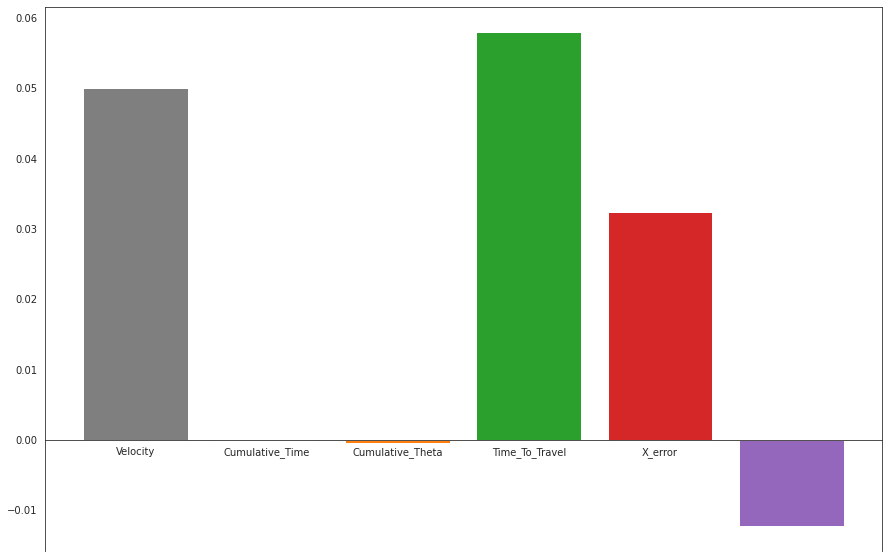

In [25]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(15,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lreg_coef["Columns"],  
lreg_coef['Coefficient Estimate'],  
color = color) 
ax.spines['bottom'].set_position('zero') 
ax.axes.xaxis.set_ticklabels(lreg_coef["Columns"])
plt.style.use('ggplot') 
plt.show()

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

In [27]:
##Calculating the Mean-Squared Error(MSE):
mse1 = np.mean((y_pred1 - y_test)**2)
print("Mean Squared Error: ", mse1)

Mean Squared Error:  0.17726748305713716


In [28]:
"""putting together the coefficient and their corresponding variable names"""
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = x_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coef)

            Columns  Coefficient Estimate
0          Velocity              0.000000
1   Cumulative_Time              0.000052
2  Cumulative_Theta             -0.000160
3    Time_To_Travel              0.000000
4           X_error              0.000000
5           Y_error              0.000000


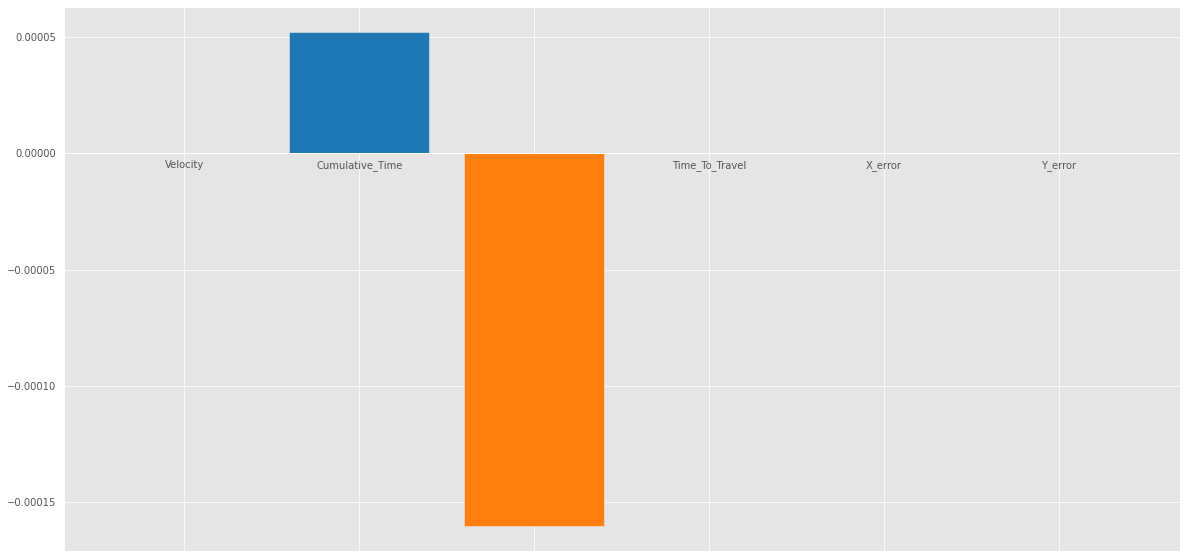

In [29]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lasso_coef["Columns"],  
lasso_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred2 = ridge.predict(x_test)


In [31]:
# Calculating the Mean Squared Error
mse2 = np.mean((y_pred2 - y_test)**2)
print("Mean Square Error:", mse2)


Mean Square Error: 0.16212818018381311


In [32]:
"""putting together the coefficient and their corresponding variable names"""
ridge_coef = pd.DataFrame()
ridge_coef['Columns'] = x_train.columns
ridge_coef['Coefficient Estimate'] = pd.Series(ridge.coef_)
print(ridge_coef)

            Columns  Coefficient Estimate
0          Velocity              0.049945
1   Cumulative_Time             -0.000194
2  Cumulative_Theta             -0.000346
3    Time_To_Travel              0.057987
4           X_error              0.032452
5           Y_error             -0.012215


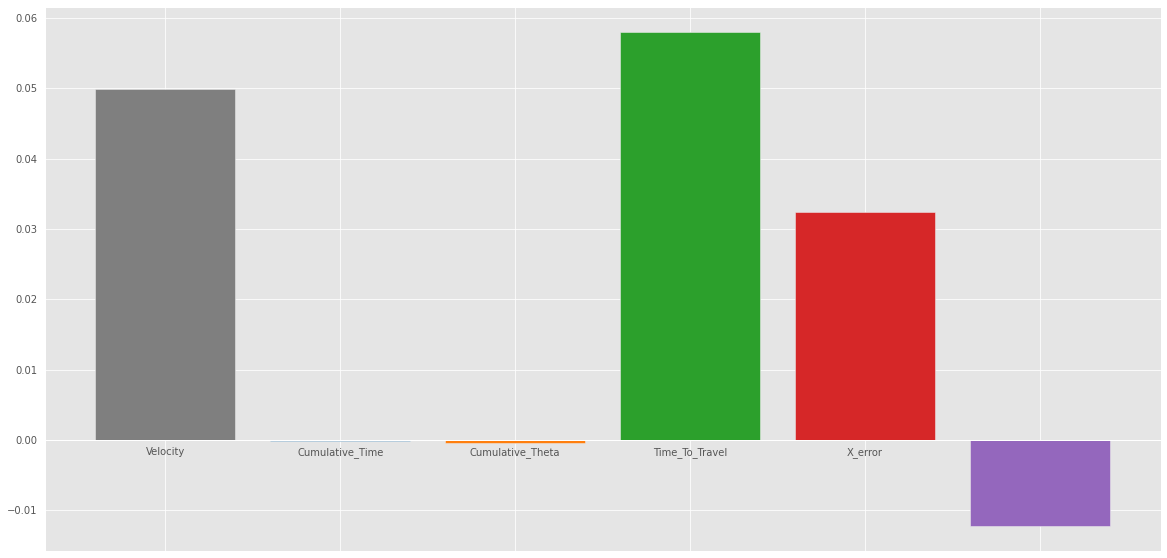

In [33]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(ridge_coef["Columns"],  
ridge_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [34]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(x_test, y_test)
y_pred3 = enet.predict(x_test)

In [35]:
#Calculating0 the Mean Squared Error
mse3 = np.mean((y_pred3 - y_test)**2)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.17722552655495746


In [36]:
"""putting together the coefficient and their corresponding variable names"""
enet_coef = pd.DataFrame()
enet_coef['Columns'] = x_train.columns
enet_coef['Coefficient Estimate'] = pd.Series(enet.coef_)
print(enet_coef)

            Columns  Coefficient Estimate
0          Velocity              0.000000
1   Cumulative_Time              0.000043
2  Cumulative_Theta             -0.000141
3    Time_To_Travel              0.000000
4           X_error              0.000000
5           Y_error              0.000000


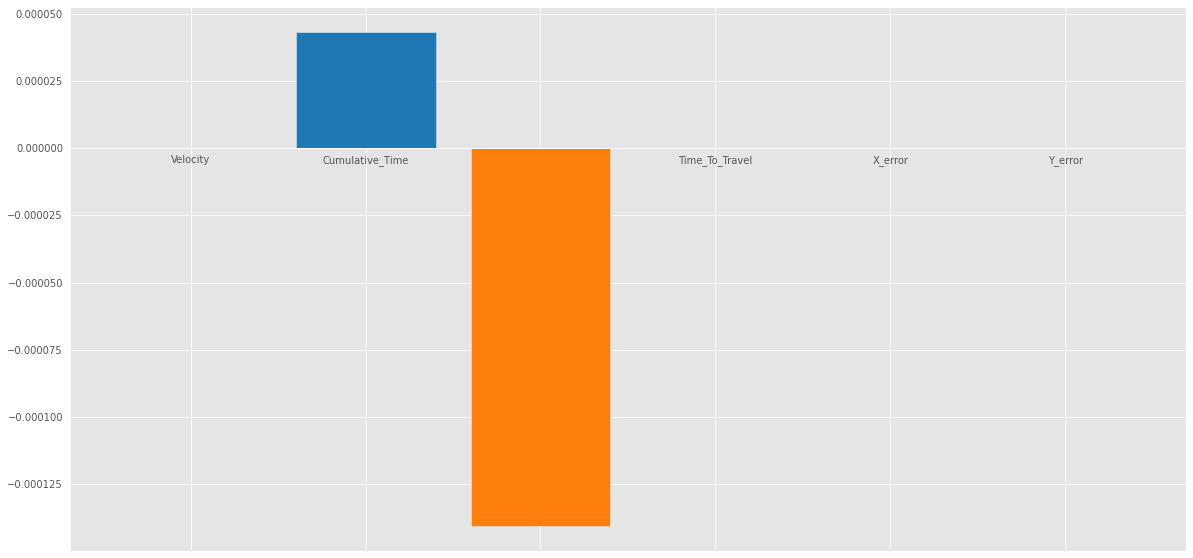

In [37]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(enet_coef["Columns"],enet_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 


In [38]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
#Setting the value for X and Y
x = mobile_robot_data[['Cumulative_Theta']]
y = mobile_robot_data['Distance_travelled_error']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


In [41]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  1.4208392892091353
Coefficient: [0.00622844]


In [42]:
print('Regression Equation: Distance_travelled_error = 1.4208392892091353 + 0.00622844 * Cumulative_Theta')

Regression Equation: Distance_travelled_error = 1.4208392892091353 + 0.00622844 * Cumulative_Theta


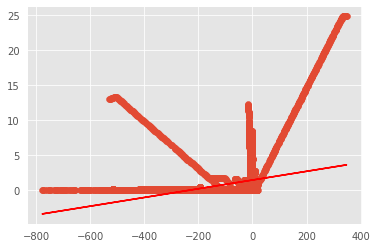

In [43]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.4208392892091353 + 0.00622844 * x_train, 'r')
plt.show()

In [44]:
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [46]:
print("Prediction for test set: {}".format(y_pred_slr))
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

Prediction for test set: [1.42083929 0.49324448 1.42083929 ... 1.42083929 1.42083929 1.42083929]


,Actual value,Predicted value
8296,0.040560,1.420839
2671,0.055697,0.493244
4090,0.079448,1.420839
11736,1.326478,0.489440
9769,1.682904,0.759902
...,...,...
8604,0.001823,1.420839
10617,0.028004,1.420839
5966,0.944137,1.420839
9516,0.005450,1.420839


In [47]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 5.70


In [48]:

# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.8246673470848287
Mean Square Error: 10.834197050361515
Root Mean Square Error: 3.29153414844226


In [49]:
x = mobile_robot_data[['Velocity', 'Cumulative_Time']]
y = mobile_robot_data['X_error']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)


In [50]:

mlr= LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [51]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

0.2192164814579718


[('Velocity', -1.3250919100021554), ('Cumulative_Time', 0.0018754614081709954)]

In [52]:
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [1.49512442 0.8667407  1.81245407 ... 0.37895982 2.3970742  0.14356897]


In [53]:

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
8296,1.137921,1.495124
2671,0.004664,0.866741
4090,2.853963,1.812454
11736,0.157958,-0.118889
9769,0.712996,0.187886
...,...,...
8604,0.653193,0.832711
10617,5.163734,3.964486
5966,1.469517,0.378960
9516,1.246062,2.397074


In [54]:

# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 51.30


In [55]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.13296558294372
Mean Square Error: 3.180042641840551
Root Mean Square Error: 1.7832674061510099


In [56]:

# define dataset
X=mobile_robot_data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','Surface_Type'	,'X_error','Y_error']]
model=LogisticRegression(random_state=1)
# define the model
features=pd.get_dummies(mobile_robot_data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','X_error','Y_error','Surface_Type']])
model = LogisticRegression(random_state=1)
model.fit(features,mobile_robot_data['Label'])
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance')
feature_importance


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,feature,feature_importance
0,Theta,-0.505914
1,Velocity,0.339463
2,Cumulative_Time,-0.000096
3,Cumulative_Theta,0.000783
4,X_error,0.529886
5,Y_error,0.612471
6,Surface_Type_CARPET,0.432788
7,Surface_Type_TILE,-0.073481


In [57]:
model=RandomForestClassifier()
 
model.fit(features,mobile_robot_data['Label'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance')

,features,feature_importance
7,Surface_Type_TILE,0.011000
6,Surface_Type_CARPET,0.011741
0,Theta,0.027218
3,Cumulative_Theta,0.054595
1,Velocity,0.196385
4,X_error,0.220143
2,Cumulative_Time,0.228280
5,Y_error,0.250637


In [58]:
model=smf.logit('Label~Theta+Velocity+Cumulative_Time+Cumulative_Theta+Surface_Type',data=mobile_robot_data)
result = model.fit()
 
feature_importances=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
feature_importances.sort_values('absolute_coefficients',ascending=False).drop('Intercept')[['absolute_coefficients']]


Optimization terminated successfully.
         Current function value: 0.531569
         Iterations 6


,absolute_coefficients
Surface_Type[T.TILE],0.351040
Velocity,0.231863
Theta,0.183890
Cumulative_Time,0.000417
Cumulative_Theta,0.000186


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [60]:
X=mobile_robot_data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=mobile_robot_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

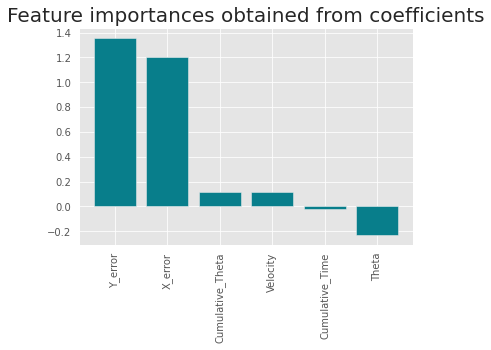

In [62]:

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

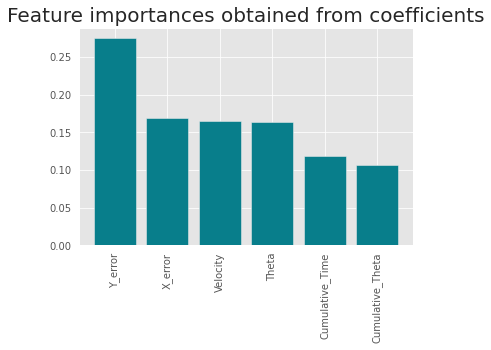

In [64]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
X=roomba_data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=roomba_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


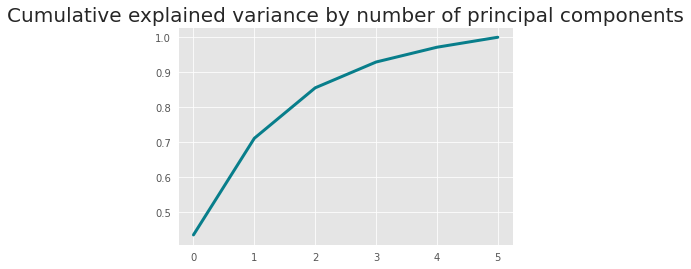

In [69]:
X=mobile_robot_data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=mobile_robot_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


In [70]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

In [71]:
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6
Theta,0.522311,-0.765349,-0.088462,0.061441,0.350458,0.084327
Velocity,-0.435974,0.188910,-0.877834,-0.008752,0.050595,0.033334
Cumulative_Time,0.736163,0.431892,-0.104403,0.487887,0.033003,-0.147005
Cumulative_Theta,0.526954,-0.737558,-0.255240,-0.096044,-0.268843,-0.178267
X_error,0.908002,0.209632,-0.102114,-0.040054,-0.172373,0.299905


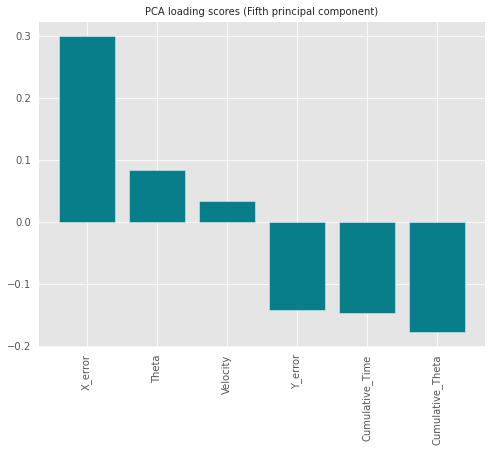

In [72]:
pc1_loadings = loadings.sort_values(by='PC6', ascending=False)[['PC6']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC6']
plt.figure(figsize=(8,6))
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC6'], color='#087E8B')
plt.title('PCA loading scores (Fifth principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()


In [73]:
data1=mobile_robot_data.copy(deep=True)
data1=data1.drop(['Distance_travelled_error','X_error','Y_error'],axis=1)
data1

,X_ODOM,Y_ODOM,Theta,Velocity,Odometry_Distance,X_GR,Y_GR,Ground_Truth_Distance,Surface_Type,Time_To_Travel,Cumulative_Time,Cumulative_Theta,Series_ID,timestamp,Label
0,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011141,-0.001021,0.012151,TILE,0.545720,0.545720,0.000000e+00,0.0,2021-10-27 12:37:24.312,1
1,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011228,-0.001021,0.012384,TILE,0.596121,1.141841,0.000000e+00,0.0,2021-10-27 12:37:24.510,1
2,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011441,-0.001022,0.013017,TILE,0.646103,1.787944,0.000000e+00,0.0,2021-10-27 12:37:24.609,1
3,0.001,-0.001,0.000000e+00,0.25,0.002000,0.013168,-0.001025,0.020518,TILE,0.696950,2.484894,0.000000e+00,0.0,2021-10-27 12:37:24.708,1
4,0.007,-0.001,0.000000e+00,0.25,0.008000,0.015079,-0.001028,0.029477,TILE,0.733509,3.218403,0.000000e+00,0.0,2021-10-27 12:37:24.807,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.410241,-0.003200,2.113419,CARPET,9.502222,746.610621,-3.477997e-14,61.0,2021-10-30 13:17:26.993,1
13314,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.414512,-0.003207,2.113332,CARPET,9.535574,756.146195,-3.502490e-14,61.0,2021-10-30 13:17:27.092,1
13315,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.420822,-0.003216,2.113390,CARPET,9.585728,765.731923,-3.526983e-14,61.0,2021-10-30 13:17:27.193,1
13316,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.427019,-0.003226,2.113390,CARPET,9.635704,775.367627,-3.551476e-14,61.0,2021-10-30 13:17:27.290,1


In [63]:
array=data1.values
x=array[:,0:5]
y=array[:,5]
y

array([0.011140759764947095, 0.011228246199607671, 0.01144058913015506,
       ..., 1.4208224219725427, 1.4270192956350094, 1.4310897617335054],
      dtype=object)

In [82]:
from sklearn.neighbors import NearestNeighbors
df = mobile_robot_data[['Velocity','Cumulative_Time','Distance_travelled_error','X_error','Y_error']]
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(df)


NearestNeighbors(n_neighbors=3)

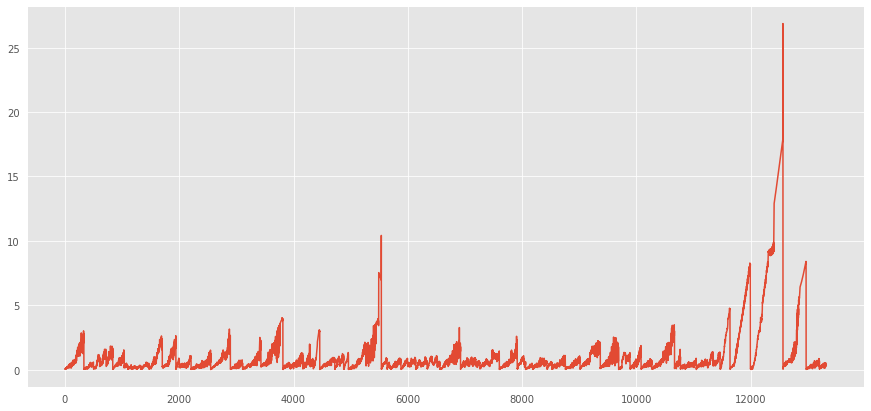

In [83]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [84]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0        0.051077
1        0.059837
2        0.051311
3        0.042165
4        0.026043
           ...   
13313    0.533142
13314    0.232052
13315    0.413464
13316    0.364856
13317    0.337370
Length: 13318, dtype: float64

In [85]:
distances_mean.describe()

count    13318.000000
mean         1.132364
std          2.153856
min          0.010643
25%          0.281566
50%          0.499655
75%          0.955900
max         26.864591
dtype: float64

In [86]:
th = 9.0
outlier_index = np.where(distances_mean > th)
outlier_index


(array([ 5536, 12306, 12307, 12308, 12309, 12310, 12311, 12312, 12313,
        12314, 12315, 12316, 12317, 12318, 12319, 12320, 12321, 12322,
        12324, 12325, 12326, 12327, 12329, 12330, 12332, 12333, 12335,
        12336, 12338, 12339, 12341, 12342, 12344, 12347, 12350, 12352,
        12353, 12355, 12358, 12360, 12361, 12363, 12365, 12366, 12368,
        12370, 12371, 12373, 12375, 12376, 12377, 12378, 12380, 12381,
        12382, 12383, 12384, 12385, 12386, 12387, 12388, 12389, 12390,
        12391, 12392, 12393, 12394, 12395, 12396, 12397, 12398, 12399,
        12400, 12401, 12402, 12403, 12404, 12405, 12406, 12407, 12408,
        12409, 12410, 12411, 12412, 12413, 12414, 12415, 12416, 12417,
        12418, 12419, 12420, 12421, 12422, 12423, 12424, 12425, 12426,
        12427, 12428, 12429, 12430, 12431, 12432, 12433, 12434, 12435,
        12436, 12437, 12438, 12439, 12440, 12441, 12442, 12443, 12444,
        12445, 12446, 12447, 12448, 12449, 12450, 12451, 12452, 12453,
      

In [87]:
outlier_values = df.iloc[outlier_index]
outlier_values

,Velocity,Cumulative_Time,Distance_travelled_error,X_error,Y_error
5536,0.11,4080.069462,0.000467,1.996135,0.021727
12306,-0.50,2037.223603,13.158233,10.508758,8.027898
12307,-0.50,2051.448576,13.196104,10.548774,8.058903
12308,-0.50,2065.723657,13.194645,10.587110,8.087010
12309,-0.50,2080.048922,13.283292,10.626188,8.118036
...,...,...,...,...,...
12561,-0.50,7248.401346,24.810752,19.799473,15.136961
12562,-0.50,7275.130336,24.810118,19.799512,15.136973
12563,-0.50,7301.927126,24.811019,19.799586,15.136997
12564,-0.50,7328.757810,24.808818,19.799627,15.137010


Text(0, 0.5, 'Y_error of the robot')

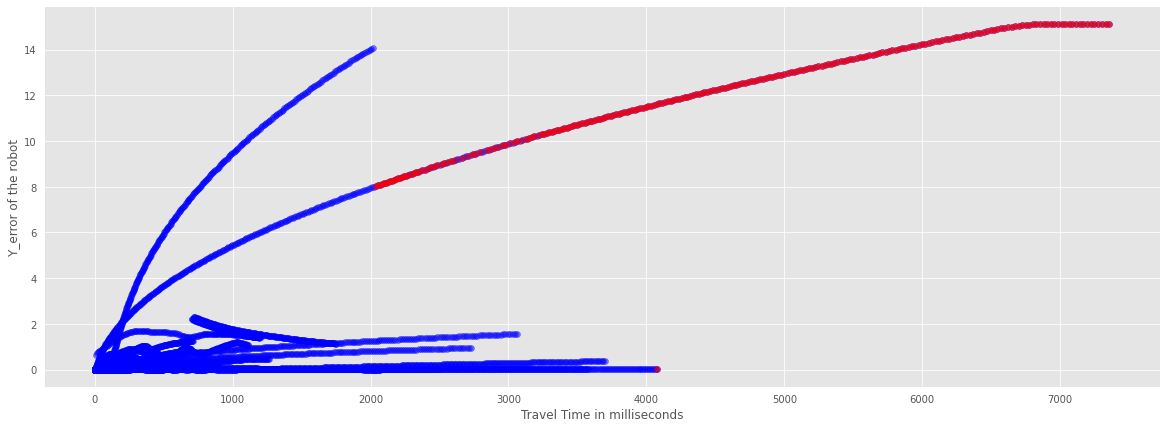

In [88]:
#'X_ODOM','Y_ODOM','X_GR','Y_GR','Theta','Velocity',
plt.figure(figsize=(20, 7))
plt.scatter(df["Cumulative_Time"], df["Y_error"], color = "b",alpha=0.5)
# plot outlier values
plt.scatter(outlier_values["Cumulative_Time"], outlier_values["Y_error"], color = "r",alpha=0.6)
plt.xlabel('Travel Time in milliseconds')
plt.ylabel('Y_error of the robot')

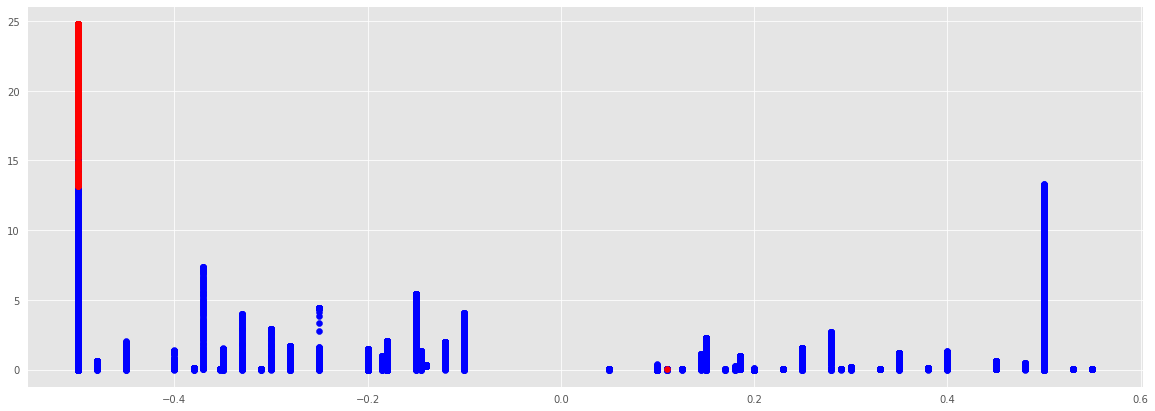

In [89]:
plt.figure(figsize=(20, 7))
plt.scatter(df["Velocity"], df["Distance_travelled_error"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Velocity"], outlier_values["Distance_travelled_error"], color = "r")

Text(0, 0.5, 'Distance_travelled_error')

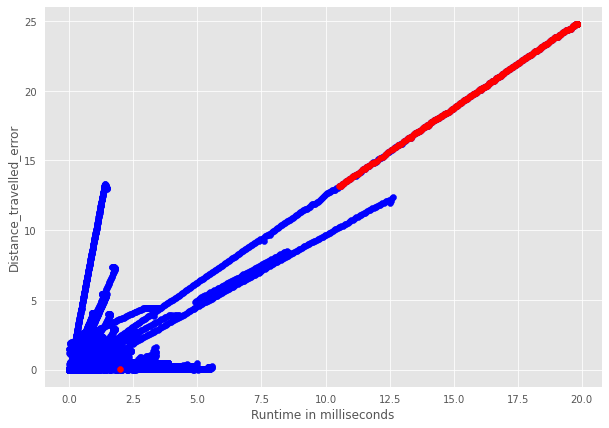

In [90]:
plt.figure(figsize=(10, 7))
plt.scatter(df["X_error"], df["Distance_travelled_error"], color = "b")
# plot outlier values
plt.scatter(outlier_values["X_error"], outlier_values["Distance_travelled_error"], color = "r")
plt.xlabel("Runtime in milliseconds")
plt.ylabel("Distance_travelled_error")